Cosmology (compact) SS2020 

# Exercise sheet 4

## 1. The abundance of dark-matter haloes from the Illustris and TNG simulations

### Read files

In [1]:
#%matplotlib widget
import sys
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd
import matplotlib.colors as clr

In [2]:
# Read file, find the data, read the header
fname = "simulation"
f = h5py.File("/u/yali/cosmology/"+fname+".hdf5", 'r')
print(f["Snapshots"]["99"]["PartType1"].keys())

header = dict(f["Header"].attrs.items())
h = header["HubbleParam"]
mass_dm = header["MassTable"][1] * 1e10 / h
lbox = header["BoxSize"]/h

snapshot = 99
header_snapshot = dict(f["Snapshots/{}/Header".format(snapshot)].attrs.items())
z_snapshot = round(header_snapshot["Redshift"], 1)
a = header_snapshot["Time"]

<KeysViewHDF5 ['Coordinates', 'ParticleIDs', 'Potential', 'SubfindDMDensity', 'SubfindDensity', 'SubfindHsml', 'SubfindVelDisp', 'Velocities']>


### Plot cumulative dark-matter halo mass functions

In [3]:
groupsdf = pd.DataFrame()
groupsdf["GroupPosX"] = f["Groups/{}/Group/GroupPos".format(snapshot)][:,0] * a/h
groupsdf["GroupPosY"] = f["Groups/{}/Group/GroupPos".format(snapshot)][:,1] * a/h
groupsdf["GroupPosZ"] = f["Groups/{}/Group/GroupPos".format(snapshot)][:,2] * a/h
groupsdf["M_FOF"] = f["Groups/{}/Group/GroupMass".format(snapshot)][:] * 1e10/h
groupsdf["M200c"] = f["Groups/{}/Group/Group_M_Crit200".format(snapshot)][:] * 1e10/h
groupsdf["M200m"] = f["Groups/{}/Group/Group_M_Mean200".format(snapshot)][:] * 1e10/h
groupsdf["M500c"] = f["Groups/{}/Group/Group_M_Crit500".format(snapshot)][:] * 1e10/h
groupsdf["R200c"] = f["Groups/{}/Group/Group_R_Crit200".format(snapshot)][:] * a/h
groupsdf["R200m"] = f["Groups/{}/Group/Group_R_Mean200".format(snapshot)][:] * a/h
groupsdf["R500c"] = f["Groups/{}/Group/Group_R_Crit500".format(snapshot)][:] * a/h

Based on fof mass: 
The maximal mass of the subhalos is 6.19e+14 M_sun
The minimal mass of the subhalos is 1.81e+10  M_sun
Number of haloes M_FOF > 10^12 Msun: 2529
Based on 200c mass: 
The maximal mass of the subhalos is 3.68e+14 M_sun
The minimal mass of the subhalos is 2.83e+09  M_sun
Number of haloes M_200c > 10^12 Msun: 1968
Based on 200m mass: 
The maximal mass of the subhalos is 5.39e+14 M_sun
The minimal mass of the subhalos is 2.83e+09  M_sun
Number of haloes M_200m > 10^12 Msun: 2525
Based on 500c mass: 
The maximal mass of the subhalos is 2.21e+14 M_sun
The minimal mass of the subhalos is 2.83e+09  M_sun
Number of haloes M_500c > 10^12 Msun: 1525
In the following we plot the cumulative dark-matter halo mass functions.


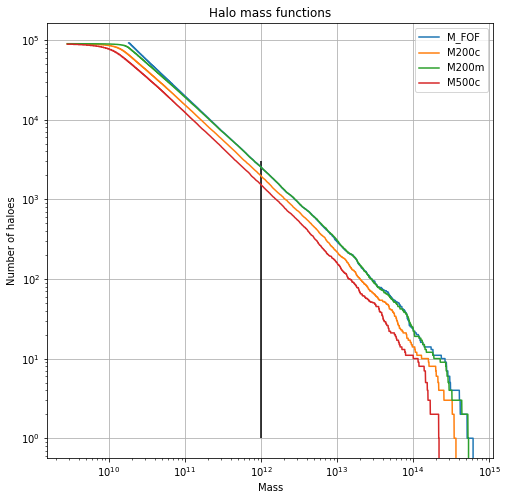

In [4]:
plt.figure(figsize=(8, 8))

Nbin = 5000

mass_max = np.max(groupsdf["M_FOF"])
mass_min = np.min(groupsdf["M_FOF"])
print("Based on fof mass: ")
print(f"The maximal mass of the subhalos is {mass_max :.2e} M_sun")
print(f"The minimal mass of the subhalos is {mass_min :.2e}  M_sun")
bins1 = np.logspace(np.log10(mass_min-1),np.log10(mass_max+1), Nbin)
groupsdf["binned_FOF"] = pd.cut(groupsdf['M_FOF'], bins=bins1, labels=range(len(bins1)-1))
values1 = groupsdf.groupby(groupsdf["binned_FOF"]).size()
cumulative1 = np.cumsum(values1)
N1 = cumulative1[-1] - cumulative1
print(f"Number of haloes M_FOF > 10^12 Msun: {N1[np.argmin(np.abs(bins1 - 1e12))]:d}")
plt.plot(bins1[:-1], N1,  label = "M_FOF")

mass_max = np.max(groupsdf["M200c"])
mass_min = np.min(groupsdf["M200c"][groupsdf["M200c"] > 0])
print("Based on 200c mass: ")
print(f"The maximal mass of the subhalos is {mass_max :.2e} M_sun")
print(f"The minimal mass of the subhalos is {mass_min :.2e}  M_sun")
bins2 = np.logspace(np.log10(mass_min-1),np.log10(mass_max+1), Nbin)
groupsdf["binned_200c"] = pd.cut(groupsdf['M200c'], bins=bins2, labels=range(len(bins2)-1))
values2 = groupsdf.groupby(groupsdf["binned_200c"]).size()
cumulative2 = np.cumsum(values2)
N2 = cumulative2[-1] - cumulative2
print(f"Number of haloes M_200c > 10^12 Msun: {N2[np.argmin(np.abs(bins2 - 1e12))]:d}")
plt.plot(bins2[:-1], N2, label = "M200c")

mass_max = np.max(groupsdf["M200m"])
mass_min = np.min(groupsdf["M200m"][groupsdf["M200m"] > 0])
print("Based on 200m mass: ")
print(f"The maximal mass of the subhalos is {mass_max :.2e} M_sun")
print(f"The minimal mass of the subhalos is {mass_min :.2e}  M_sun")
bins3 = np.logspace(np.log10(mass_min-1),np.log10(mass_max+1), Nbin)
groupsdf["binned_200m"] = pd.cut(groupsdf['M200m'], bins=bins3, labels=range(len(bins3)-1))
values3 = groupsdf.groupby(groupsdf["binned_200m"]).size()
cumulative3 = np.cumsum(values3)
N3 = cumulative3[-1] - cumulative3
print(f"Number of haloes M_200m > 10^12 Msun: {N3[np.argmin(np.abs(bins3 - 1e12))]:d}")
plt.plot(bins3[:-1], N3, label = "M200m")

mass_max = np.max(groupsdf["M500c"])
mass_min = np.min(groupsdf["M500c"][groupsdf["M500c"] > 0])
print("Based on 500c mass: ")
print(f"The maximal mass of the subhalos is {mass_max :.2e} M_sun")
print(f"The minimal mass of the subhalos is {mass_min :.2e}  M_sun")
bins4 = np.logspace(np.log10(mass_min-1),np.log10(mass_max+1), Nbin)
groupsdf["binned_500c"] = pd.cut(groupsdf['M500c'], bins=bins4, labels=range(len(bins4)-1))
values4 = groupsdf.groupby(groupsdf["binned_500c"]).size()
cumulative4 = np.cumsum(values4)
N4 = cumulative4[-1] - cumulative4
print(f"Number of haloes M_500c > 10^12 Msun: {N4[np.argmin(np.abs(bins4 - 1e12))]:d}")
plt.plot(bins4[:-1], N4, label = "M500c")

print("In the following we plot the cumulative dark-matter halo mass functions.")

plt.title("Halo mass functions")
plt.xlabel("Mass")
plt.ylabel("Number of haloes")
plt.xscale("log")
plt.yscale("log")
plt.vlines(1e12, 1, 3e3)
plt.legend()
plt.grid()
plt.show()

In [5]:
print("Compare with directly counting the elements in the array: ")
print("Number of haloes M_FOF > 10^12 Msun: %.f"%(len(groupsdf["M_FOF"][groupsdf["M_FOF"] > 1e12])))
print("Number of haloes M200c > 10^12 Msun: %.f"%(len(groupsdf["M200c"][groupsdf["M200c"] > 1e12])))
print("Number of haloes M200m > 10^12 Msun: %.f"%(len(groupsdf["M200m"][groupsdf["M200m"] > 1e12])))
print("Number of haloes M500c > 10^12 Msun: %.f"%(len(groupsdf["M500c"][groupsdf["M500c"] > 1e12])))

Compare with directly counting the elements in the array: 
Number of haloes M_FOF > 10^12 Msun: 2532
Number of haloes M200c > 10^12 Msun: 1969
Number of haloes M200m > 10^12 Msun: 2531
Number of haloes M500c > 10^12 Msun: 1535


In [6]:
Vbox = (lbox/1000)**3
print(f"Volume encompassed by the simulation {Vbox:2e} Mpc^3")

Volume encompassed by the simulation 1.357214e+06 Mpc^3


In above comparison the numbers are close, we could say that our binnings of halo mass are appropriate characterizing the halo mass as "functions". 

As we can see the number of haloes M200m > 10^12 Msun is maximal if the halo mass is defined as mass encompassed by a volume in which the density is 200 times of the mean density of the Universe. That is due to that the mean density is lower than the critical density of the Universe, so that halos have a larger radius and thus contain more mass.

Now we plot accumulative number density funciton.

In [20]:
groupsdf["V200c"] = (groupsdf["R200c"]/1000)**3 *(4/3) * np.pi
groupsdf["V200m"] = (groupsdf["R200m"]/1000)**3 *(4/3) * np.pi
groupsdf["V500c"] = (groupsdf["R500c"]/1000)**3 *(4/3) * np.pi
V2 = groupsdf.groupby(groupsdf["binned_200c"])["V200c"].sum()
V3 = groupsdf.groupby(groupsdf["binned_200m"])["V200m"].sum()
V4 = groupsdf.groupby(groupsdf["binned_500c"])["V500c"].sum()
Vcumulative2 = np.cumsum(V2)
v2 = Vcumulative2[-1] - Vcumulative2
Vcumulative3 = np.cumsum(V3)
v3 = Vcumulative3[-1] - Vcumulative3
Vcumulative4 = np.cumsum(V4)
v4 = Vcumulative4[-1] - Vcumulative4
n2 = N2/v2
x2 = groupsdf.groupby(groupsdf["binned_200c"])["M200c"].median()
n3 = N3/v3
x3 = groupsdf.groupby(groupsdf["binned_200m"])["M200m"].median()
n4 = N4/v4
x4 = groupsdf.groupby(groupsdf["binned_500c"])["M500c"].median()

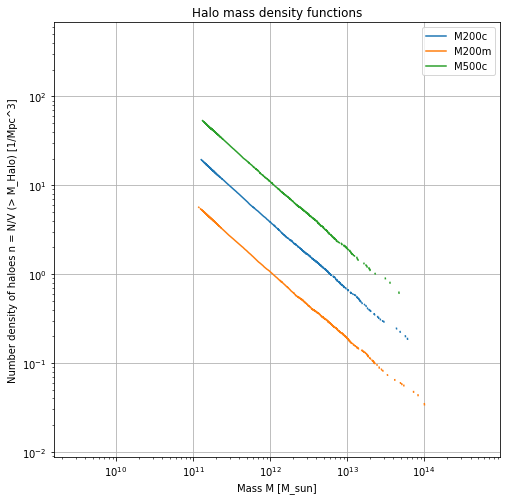

In [21]:
plt.figure(figsize=(8, 8))
plt.plot(x2, n2, label = "M200c")
plt.plot(x3, n3, label = "M200m")
plt.plot(x4, n4, label = "M500c")
plt.title("Halo mass density functions")
plt.xlabel("Mass M [M_sun]")
plt.ylabel("Number density of haloes n = N/V (> M_Halo) [1/Mpc^3]")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.grid()
plt.show()

In [9]:
print("Considering the same order of magnitude, Milky-Way like haloes (~10^12 solar masses) in comparison to haloes of 10^14 solar masses: %.f more numerous"%(len(groupsdf["M_FOF"][groupsdf["M_FOF"] > 1e12][groupsdf["M_FOF"] < 1e13])-len(groupsdf["M_FOF"][groupsdf["M_FOF"] > 1e14][groupsdf["M_FOF"] < 1e15])))
print("Considering the same order of magnitude, haloes of 10^13 solar masses in comparison to haloes of 10^11 solar masses: %.f less numerous"%(len(groupsdf["M_FOF"][groupsdf["M_FOF"] > 1e11][groupsdf["M_FOF"] < 1e12])-len(groupsdf["M_FOF"][groupsdf["M_FOF"] > 1e13][groupsdf["M_FOF"] < 1e14])))

Considering the same order of magnitude, Milky-Way like haloes (~10^12 solar masses) in comparison to haloes of 10^14 solar masses: 2215 more numerous
Considering the same order of magnitude, haloes of 10^13 solar masses in comparison to haloes of 10^11 solar masses: 17008 less numerous


The minimum halo mass I plotted for the halo mass function is less than 1E+10 M_sun. I don't know why.

The minimum halo mass I plotted for the halo mass density function is greater than 1E+11 M_sun, because the mass is taken from the median of the mass inside each bin of the histogram.

### Compare TNG100-3-Dark with TNG300-3-Dark

In [22]:
M2 = groupsdf.groupby(groupsdf["binned_200c"])["M200c"].sum()
M3 = groupsdf.groupby(groupsdf["binned_200m"])["M200m"].sum()
M4 = groupsdf.groupby(groupsdf["binned_500c"])["M500c"].sum()
y2 = values2/V2/M2
y3 = values3/V3/M3
y4 = values4/V4/M4

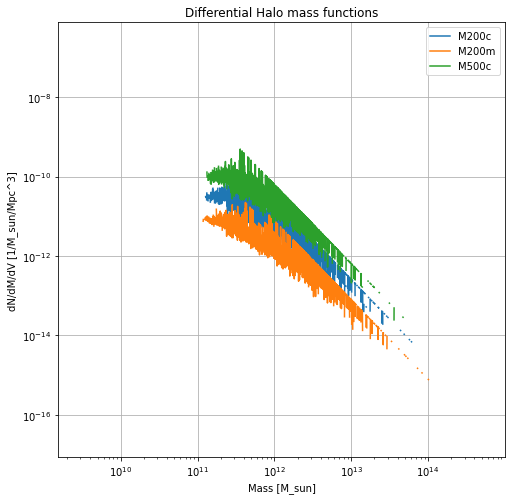

In [23]:
plt.figure(figsize=(8, 8))
plt.plot(x2, y2, label = "M200c")
plt.plot(x3, y3, label = "M200m")
plt.plot(x4, y4, label = "M500c")
plt.title("Differential Halo mass functions")
plt.xlabel("Mass [M_sun]")
plt.ylabel("dN/dM/dV [1/M_sun/Mpc^3]")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.grid()
plt.show()

In [12]:
f2 = h5py.File("/u/yali/cosmology/TNG300-3-Dark/"+fname+".hdf5", 'r')
print(f["Snapshots"]["99"]["PartType1"].keys())

header = dict(f["Header"].attrs.items())
h = header["HubbleParam"]
mass_dm = header["MassTable"][1] * 1e10 / h
lbox = header["BoxSize"]/h

snapshot = 99
header_snapshot = dict(f["Snapshots/{}/Header".format(snapshot)].attrs.items())
z_snapshot = round(header_snapshot["Redshift"], 1)
a = header_snapshot["Time"]

<KeysViewHDF5 ['Coordinates', 'ParticleIDs', 'Potential', 'SubfindDMDensity', 'SubfindDensity', 'SubfindHsml', 'SubfindVelDisp', 'Velocities']>


In [ ]:
groupsdf2 = pd.DataFrame()
#groupsdf2["GroupPosX"] = f2["Groups/{}/Group/GroupPos".format(snapshot)][:,0] * a/h
#groupsdf2["GroupPosY"] = f2["Groups/{}/Group/GroupPos".format(snapshot)][:,1] * a/h
#groupsdf2["GroupPosZ"] = f2["Groups/{}/Group/GroupPos".format(snapshot)][:,2] * a/h
#groupsdf2["M_FOF"] = f2["Groups/{}/Group/GroupMass".format(snapshot)][::1000] * 1e10/h
groupsdf2["M200c"] = f2["Groups/{}/Group/Group_M_Crit200".format(snapshot)][::10000] * 1e10/h
#groupsdf2["M200m"] = f2["Groups/{}/Group/Group_M_Mean200".format(snapshot)][:] * 1e10/h
#groupsdf2["M500c"] = f2["Groups/{}/Group/Group_M_Crit500".format(snapshot)][:] * 1e10/h
groupsdf2["R200c"] = f2["Groups/{}/Group/Group_R_Crit200".format(snapshot)][::10000] * a/h
#groupsdf2["R200m"] = f2["Groups/{}/Group/Group_R_Mean200".format(snapshot)][:] * a/h
#groupsdf2["R500c"] = f2["Groups/{}/Group/Group_R_Crit500".format(snapshot)][:] * a/h

In [24]:
print("In TNG100-3-Dark the number of haloes M_FOF > 10^14 Msun: %.f"%(len(groupsdf["M_FOF"][groupsdf["M_FOF"] > 1e14])))
print("In TNG300-3-Dark the number of haloes M_FOF > 10^14 Msun: %.f"%(len(groupsdf2["M_FOF"][groupsdf2["M_FOF"] > 1e14])))

In TNG100-3-Dark the number of haloes M_FOF > 10^14 Msun: 24


NameError: name 'groupsdf2' is not defined